<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Kaggle_Fraud_Detection_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Kaggle 신용카드 사기 검출(Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Credit Card Fraud Detection
* creditcard.csv(284,807 * 31)
* Class : 0(정상), 1(사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

## 1.Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


## 2.Data Preprocessing

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 18 04:10 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


In [ ]:
%%time

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#0 : 정상, 1 : 사기

DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
(DF.Class.value_counts() / DF.shape[0] * 100)

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
#time 열 삭제
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


## 3.Keras Modeling

In [103]:
#Data Split : 이진분류이므로 y를 굳이 원핫인코딩 할 필요는 없음(둘 중 하나로만 결과가 나오면 되므로)
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [105]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


In [110]:
#Define : 모델 신경망 구조 정의

Model_FD = models.Sequential()

Model_FD.add(layers.Dense(128, activation = 'relu', input_shape = (29,)))
Model_FD.add(layers.Dense(64, activation = 'relu'))
Model_FD.add(layers.Dense(32, activation = 'relu'))
Model_FD.add(layers.Dense(1, activation = 'sigmoid')) # 이진분류

In [111]:
#확인
Model_FD.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


In [112]:
#Compile : 학습방법 설정
Model_FD.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['Recall'])

In [131]:
#Fit : 모델 학습 수행
History_FD = Model_FD.fit(X_train, y_train,
                          epochs = 100, #빠른 테스트를 위해 횟수는 적게 잡았다
                          batch_size = 1024,
                          validation_data = (X_test, y_test))

Epoch 1/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0026 - recall: 0.8605 - val_loss: 0.0037 - val_recall: 0.8243
Epoch 2/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0020 - recall: 0.8576 - val_loss: 0.0037 - val_recall: 0.8378
Epoch 3/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0027 - recall: 0.8576 - val_loss: 0.0038 - val_recall: 0.8378
Epoch 4/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0019 - recall: 0.8779 - val_loss: 0.0036 - val_recall: 0.8108
Epoch 5/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0016 - recall: 0.8808 - val_loss: 0.0036 - val_recall: 0.7568
Epoch 6/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0018 - recall: 0.8605 - val_loss: 0.0035 - val_recall: 0.8514
Epoch 7/100
195/195 [==============================] - 1s 6ms/step - loss: 0.0016 - recall: 0.8721 - val_loss: 0.0036 - val_recall: 0.8243
Epoch 8/100
195/195 [======

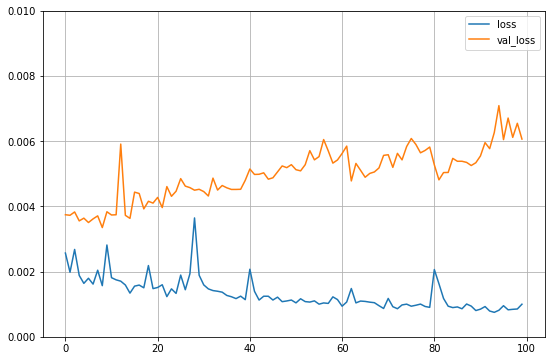

In [135]:
#학습결과 시각화
plt.figure(figsize = (9,6))
plt.ylim(0, 0.01)
plt.plot(History_FD.history['loss'])
plt.plot(History_FD.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

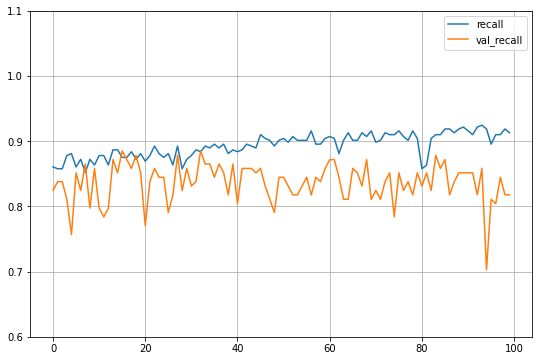

In [137]:
plt.figure(figsize = (9,6))
plt.ylim(0.6, 1.1)
plt.plot(History_FD.history['recall'])
plt.plot(History_FD.history['val_recall'])
plt.legend(['recall','val_recall'])
plt.grid()
plt.show()

In [138]:
# Predict + Validation
# 확률값 산출
np.set_printoptions(suppress = True, precision = 5)

Model_FD.predict(X_test)

array([[0.     ],
       [0.00007],
       [0.     ],
       ...,
       [0.     ],
       [0.     ],
       [0.     ]], dtype=float32)

In [139]:
#loss, recall
loss, recall = Model_FD.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

2671/2671 [==============================] - 3s 999us/step - loss: 0.0061 - recall: 0.8176
Loss = 0.00606
Recall = 0.81757


In [140]:
# y_hat(예측값)

y_hat = Model_FD.predict_classes(X_test)

y_hat

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [141]:
#confusion matrix 

confusion_matrix(y_test, y_hat)

array([[85281,    14],
       [   27,   121]])

In [143]:
# accyracy, precision, recall

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 1))
print(recall_score(y_test, y_hat, pos_label = 1))

0.9995201479348805
0.8962962962962963
0.8175675675675675


본 내용은 2021/03/18(목)에 학습한 내용입니다.